**ΠΑΡΑΚΑΤΩ ΕΧΟΥΜΕ ΑΠΛΑ ΠΑΡΑΔΕΙΓΜΑΤΑ ΝΕΥΡΩΝΙΚΩΝ ΔΙΚΤΥΩΝ ΜΕ ΤΗΝ ΧΡΗΣΗ ΔΙΑΦΟΡΩΝ ΤΕΧΝΙΚΩΝ ΟΜΑΛΟΠΟΙΗΣΗΣ
ΣΥΜΒΟΥΛΗ ΜΟΥ ΕΙΝΑΙ ΟΤΙ Ο L2 REG ΘΑ ΟΔΗΓΗΣΕΙ ΣΕ ΚΑΛΥΤΕΡΑ ΑΠΟΤΕΛΕΣΜΑΤΑ ΚΑΙ ΕΠΙΣΗΣ ΓΙΑ ΤΟ ΠΟΣΟ ΒΑΘΥ ΜΠΟΡΕΙ ΝΑ ΕΙΝΑΙ ΕΝΑ ΔΙΚΤΥΟ 
ΚΑΘΩς ΚΑΙ ΤΟ ΠΟΣΟ ΠΥΚΝΟ ΝΑ ΧΡΗΣΙΜΟΠΟΙΗΣΕΙΣ ΤΗΝ ΣΥΝΑΡΤΗΣΗ GRID
**

In [1]:
!pip install --upgrade keras
!pip install --upgrade matplotlib
!pip install --upgrade numpy
!pip install --upgrade tensorflow
!pip install --upgrade pandas
!pip install --upgrade pactools

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.2.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.2)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc1)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)
Requirement already up-to-date: pactools in /usr/local/lib/python3.6/dist-packages (0.2.0b0)


In [2]:
#ΧΡΗΣΙΜΕΣ ΒΙΒΛΙΟΘΉΚΕΣ 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

#TESNORFOW
import tensorflow as tf

#KERAS LIBRARIES
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout , Flatten
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend

#CROSS VALIDATION
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar

#WRAPPERS NEEDED FOR GRIDSEARCH
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


#EXAMPLE1

In [0]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print("train_images SHAPE :", train_images.shape)
print("train_labels SHAPE :", train_labels.shape)
print("test_images SHAPE :", test_images.shape)
print("test_labels SHAPE :", test_labels.shape)

train_images SHAPE : (60000, 28, 28)
train_labels SHAPE : (60000,)
test_images SHAPE : (10000, 28, 28)
test_labels SHAPE : (10000,)


In [0]:
train_labels1=pd.DataFrame(data=train_labels,columns=['target'])
np.sort(train_labels1.target.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# Smaller values will make easier for our model to process
train_images = train_images / 255.0
test_images = test_images / 255.0
batch_size=5000

In [0]:
def model128(): #MODEL WITH 1 HIDDEN LAYER , 128 NEURONS
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # input layer (1)
        Dense(128, activation='relu'),  # hidden layer (2)
        Dense(10, activation='softmax') # output layer (3)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def model33(): #MODEL WITH 1 HIDDEN LAYER, 33 NEURONS
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # input layer (1)
        Dense(33, activation='relu'),  # hidden layer (2)
        Dense(10, activation='softmax') # output layer (3)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def model340(): #MODEL WITH 1 HIDDEN LAYER, 340 NEURONS
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # input layer (1)
        Dense(340, activation='relu'),  # hidden layer (2)
        Dense(10, activation='softmax') # output layer (3)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def model523(): # MODEL WITH 1 HIDDEN LAYER , 523 NEURONS
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # input layer (1)
        Dense(523, activation='relu'),  # hidden layer (2)
        Dense(10, activation='softmax') # output layer (3)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [0]:
def compare(train_images,train_labels,epochs,test_images,test_labels):
    model1 = model128()
    model2 = model33()
    model3 = model340()
    model4 = model523()
    
    model1.fit(train_images, train_labels, epochs=epochs,verbose=0,batch_size=batch_size)
    model2.fit(train_images, train_labels, epochs=epochs,verbose=0,batch_size=batch_size)
    model3.fit(train_images, train_labels, epochs=epochs,verbose=0,batch_size=batch_size)
    model4.fit(train_images, train_labels, epochs=epochs,verbose=0,batch_size=batch_size)
    
    test_loss1, test_acc1 = model1.evaluate(test_images,  test_labels, verbose=2)
    test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)
    test_loss3, test_acc3 = model3.evaluate(test_images,  test_labels, verbose=2)
    test_loss4, test_acc4 = model4.evaluate(test_images,  test_labels, verbose=2)
    
    print('Test accuracy for 128 neurons and ',epochs,' epochs:', test_acc1)
    print('Test accuracy for 33 neurons and ',epochs,' epochs:', test_acc2)
    print('Test accuracy for 340 neurons and ',epochs,' epochs:', test_acc3)
    print('Test accuracy for 523 neurons and ',epochs,' epochs:', test_acc4)

In [0]:
compare(train_images,train_labels,50,test_images,test_labels)

Test accuracy for 128 neurons and  50  epochs: 0.8716999888420105
Test accuracy for 33 neurons and  50  epochs: 0.8555999994277954
Test accuracy for 340 neurons and  50  epochs: 0.8792999982833862
Test accuracy for 523 neurons and  50  epochs: 0.8809000253677368


#EXAMPLE2

In [0]:
number_of_features=1000
epochs=50
batch_size=1000

In [4]:
(X_train_data, y_train), (X_test_data, y_test) = imdb.load_data(
    num_words=number_of_features)
X1=np.concatenate((X_train_data, X_test_data), axis=0)
Y=np.concatenate((y_train, y_test), axis=0)
print('Σύνολο Εκπαίδευσης')
print('------------------')
print('Μέγεθος Δεδομένων: {}'.format(X_train_data.shape))
print('Μέγεθος Ετικετών: {}'.format(y_train.shape))
print('')
print('Σύνολο Ελέγχου')
print('------------------')
print('Μέγεθος Δεδομένων: {}'.format(X_test_data.shape))
print('Μέγεθος Ετικετών: {}'.format(y_test.shape))


Σύνολο Εκπαίδευσης
------------------
Μέγεθος Δεδομένων: (25000,)
Μέγεθος Ετικετών: (25000,)

Σύνολο Ελέγχου
------------------
Μέγεθος Δεδομένων: (25000,)
Μέγεθος Ετικετών: (25000,)


In [0]:
print('Σύνολο Εκπαίδευσης')
print('------------------')
print('Δεδομένο: {}'.format(X_train_data[0]))
print('Ετικέτα: {}'.format(y_train[0]))
print('')
print('Σύνολο Ελέγχου')
print('------------------')
print('Δεδομένο: {}'.format(X_test_data[0]))
print('Ετικέτα: {}'.format(y_test[0]))

Σύνολο Εκπαίδευσης
------------------
Δεδομένο: [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
Ετικέτα: 1

Σύνολο Ελέγχου
------------------
Δεδομένο: [1, 591, 202, 14, 31, 6, 

In [0]:
tokenizer = Tokenizer(num_words=number_of_features)

X_train_features = tokenizer.sequences_to_matrix(X_train_data, mode='count')
X_test_features = tokenizer.sequences_to_matrix(X_test_data, mode='count')
X = tokenizer.sequences_to_matrix(X1, mode='count')

Y_train_soft = backend.one_hot(y_train,2).numpy()
Y_test_soft = backend.one_hot(y_test,2).numpy()


In [0]:
print('Μέγεθος Δεδομένων Εκπαίδευσης: {}'.format(X_train_features.shape))
print('Μέγεθος Δεδομένων Ελέγχου: {}'.format(X_test_features.shape))


Μέγεθος Δεδομένων Εκπαίδευσης: (25000, 1000)
Μέγεθος Δεδομένων Ελέγχου: (25000, 1000)


In [0]:
print('Πρώτο δεδομένο εκπαίδευσης:\n {}'.format(X_train_features[0]))
print('\nΠρώτο δεδομένο ελέγχου:\n {}'.format(X_test_features[0]))
print('\nΠρώτο αποτέλεσμα εκπαιδευσης:\n {}'.format(Y_train_soft[0]))

Πρώτο δεδομένο εκπαίδευσης:
 [ 0.  1. 29.  0. 15.  9.  3.  2.  3.  1.  0.  0.  6.  3.  3.  4. 11.  3.
  3.  2.  0.  1.  6.  0.  0.  4.  3.  0.  2.  0.  1.  0.  3.  2.  0.  1.
  4.  0.  4.  1.  0.  0.  0.  4.  0.  0.  1.  0.  1.  0.  2.  2.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  2.  2.  0.  0.  0.  0.  2.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  2.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  2.  0.  1.  1.
  0.  0.  0.  0.  2.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  2.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  

In [0]:
def pff(h_base,titlos): #Plot For Fitting-Συνάρτηση για να βλέπουμε το capacity δηλαδή το overfitting - underfitting
  ax = plt.figure().gca()
  ax.plot(h_base.epoch, h_base.history['loss'], h_base.epoch, h_base.history['val_loss'])

  ax.xaxis.set_major_locator(MaxNLocator(integer=True))

  plt.title(titlos)
  plt.ylabel('Αντικειμενική Συνάρτηση')
  plt.xlabel('Εποχή')
  plt.legend(loc=1, labels=("Train Error", 'Test Error'))
  plt.show()

In [0]:
def basic(X_train_features, y_train,X_test_features, y_test): #Basic NN with 2 Hidden layers
  base = Sequential([
      Dense(32, activation='relu', input_shape=(number_of_features,)),
      Dense(16, activation='relu'),
      Dense(2, activation='softmax')  ##!!!!!!!!!!!! OTAN XRHSIMOPOEIS SOFTMAX PREPEI TA LABEL SOU NA EINAI TOSA OSA KAI TO OUTPUT, AN XREIASTEI KANE ONE HOT!!!!!
  ])

  base.compile(loss='categorical_crossentropy', optimizer='adadelta', 
              metrics=['accuracy'])
  
  '''# GIA TO APLO MONTELO
  return base
  '''
  '''
  # GIA EARLY STOPPING 
  call = early('simple',2)
  h_base = base.fit(X_train_features, y_train, epochs=epochs, verbose=0, 
                    batch_size=batch_size, 
                    callbacks=call,
                    validation_data=(X_test_features, y_test))
   
  test_loss, test_acc = base.evaluate(X_test_features, y_test, verbose=0)
  
  print("BASIC WITH EARLY STOPPING:", test_acc)
  return h_base
  #best_model = load_model('simple')
  #return best_model

  '''
  
  #TRAIN SESSION
  h_base = base.fit(X_train_features, y_train, epochs=epochs, verbose=0, 
                    batch_size=batch_size, 
                    validation_data=(X_test_features, y_test))
  
  test_loss, test_acc = base.evaluate(X_test_features, y_test, verbose=0)
  
  print("BASIC:", test_acc)
  return h_base






def regl1(X_train_features, y_train,X_test_features, y_test1,param): ## NN with 2 hidden layers and L1 regularization
    d_l1 = Sequential([
        Dense(64, activation='relu',input_shape=(number_of_features,), kernel_regularizer=l1(param)),
        Dense(32, activation='relu', kernel_regularizer=l1(param)),
        Dense(1, activation='sigmoid')
        ])

    d_l1.compile(loss='binary_crossentropy', optimizer='rmsprop', 
                metrics=['accuracy'])

    #return d_l1
    
    #TRAIN SESSION
    h_l1 = d_l1.fit(X_train_features, y_train, epochs=epochs, verbose=0, 
                    batch_size=batch_size, 
                    validation_data=(X_test_features, y_test))

    test_loss, test_acc = d_l1.evaluate(X_test_features, y_test, verbose=0)
    
    print("L1 REGULARIZATION ACCURACY:", test_acc)
    return h_l1
    

def regl2(X_train_features, y_train,X_test_features, y_test1,param): ## NN with 2 hidden layers and L2 regularization
  d_l2 = Sequential([
    Dense(units=64, activation='relu', kernel_regularizer=l2(param)),
    Dense(units=32, activation='relu', kernel_regularizer=l2(param)),
    Dense(units=1, activation='sigmoid')
  ])
  
  d_l2.compile(loss='binary_crossentropy', optimizer='rmsprop', 
             metrics=['accuracy'])
  
  #return d_l2
  
  # TRAIN SESSION 
  h_l2 = d_l2.fit(X_train_features, y_train, epochs=epochs, verbose=0, 
                batch_size=batch_size, 
                validation_data=(X_test_features, y_test))

  test_loss, test_acc = d_l2.evaluate(X_test_features, y_test, verbose=0)
    
  print("L2 REGULARIZATION ACCURACY:", test_acc)
  return h_l2
  

def drop(X_train_features, y_train,X_test_features, y_test1): ## NN with 2 hidden layers and L2 regularization
  
  d_hd = Sequential([
    Dropout(0.1, input_shape=(number_of_features,)),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])
  
  d_hd.compile(loss='binary_crossentropy', optimizer='rmsprop', 
             metrics=['accuracy'])
  
  #return d_hd
  
  #TRAIN SESSION
  h_hd = d_hd.fit(X_train_features, y_train, epochs=epochs, verbose=0, 
                batch_size=batch_size, 
                validation_data=(X_test_features, y_test))

  test_loss, test_acc = d_hd.evaluate(X_test_features, y_test, verbose=0)
    
  print("DROPOUT MODEL ACCURACY:", test_acc)
  return h_hd

In [0]:
def create_model(dense_layer_sizes, optimizer="adam", dropout=0.1, init='uniform', nbr_features=1000, dense_nparams=256):
    model = Sequential()
    model.add(Dense(dense_nparams, activation='relu', input_shape=(nbr_features,), kernel_initializer=init,)) 
    model.add(Dropout(dropout), )
    for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size, activation='relu'))
        model.add(Dropout(dropout), )
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model

In [23]:
m=create_model((10,10))
m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               256256    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [0]:
def early(name,rounds):
  callbacks = [EarlyStopping(monitor='val_loss', patience=rounds),
              ModelCheckpoint(
                  filepath=name, 
                  monitor='val_loss', 
                  save_best_only=True)
              ]
  return callbacks


In [0]:
def compareReg():# 50 epochs !! Compare Regularization Algorithms , comment out to exclude model 
  #basicmodel=basic(X_train_features, Y_train_soft,X_test_features, Y_test_soft)
  #l1model=regl1(X_train_features, y_train ,X_test_features, y_test,0.001)
  l2model=regl2(X_train_features, y_train ,X_test_features, y_test, 0.1)
  #dropoutmodel=drop(X_train_features, y_train ,X_test_features, y_test)
  #pff(basicmodel,'BASIC')
  #pff(l1model,'L1 REG')
  pff(l2model,'L2 REG')
  #pff(dropoutmodel,'DROPOUT')

L2 REGULARIZATION ACCURACY: 0.8231599926948547


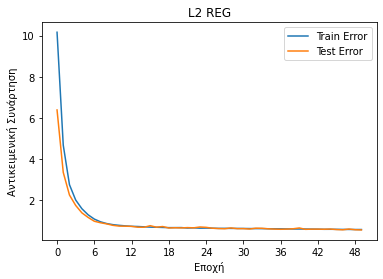

In [28]:
compareReg()

In [0]:
def crossValidation(X,Y,folds): 
  seed = 1
  np.random.seed(seed)
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)
  cvscores = []
  for train, test in kfold.split(X, Y):
    # create model
    model=regl2([],[],[],[],0.009)###REMEMBER TO COMMENT OUT AND BRING BACK ONLY THE MODEL
    # Fit the model
    model.fit(X[train], Y[train], epochs=epochs, batch_size=1000, verbose=2)
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [0]:
def grid(model_function,X,Y):  # https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/ 
  
  dense_layer_sizes = [(128,64,32,16),(128,128,128),(256,256,128),(512,1024)]
  param_grid = dict(dense_layer_sizes=dense_layer_sizes)
  print(param_grid)
  model = KerasClassifier(build_fn=model_function,epochs=50, batch_size=1000)
  grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1 ,cv=2,verbose=1)
  grid_result = grid.fit(X, Y)
  # summarize results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))


In [38]:
grid(create_model,X,Y)

{'dense_layer_sizes': [(128, 64, 32, 16), (128, 128, 128), (256, 256, 128), (512, 1024)]}
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 10.2min finished


Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.5581 - accuracy: 0.7153
Epoch 2/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.3318 - accuracy: 0.8610
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.2947 - accuracy: 0.8746
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.2614 - accuracy: 0.8895
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.2268 - accuracy: 0.9056
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.1918 - accuracy: 0.9212
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.1578 - accuracy: 0.9364
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.1276 - accuracy: 0.9484
Epoch 9/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.0995 - accuracy: 0.9612
Epoch 10/50
50000/50000 [==============================